In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\saran\\Downloads\\All Codes\\Classification\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dropna(how='any',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [10]:
df.Churn.value_counts()/len(df)*100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

In [11]:
x=df.drop(['customerID','Churn'],axis=1)
y=df.Churn.values

In [12]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [13]:
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'],
      shape=(7032,), dtype=object)

In [14]:
#convert categorical data into numericals ----> feature encoding
x=pd.get_dummies(x,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)

In [15]:
x.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [16]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [17]:
len(x_train)

5274

In [18]:
len(x_test)

1758

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [20]:
x_train_sc

array([[-0.44354534, -0.96023449, -0.21232741, ..., -0.53188301,
        -0.70740847,  1.84255258],
       [-0.44354534,  0.01554137,  0.79769509, ..., -0.53188301,
         1.41361044, -0.54272535],
       [-0.44354534, -1.12286379, -1.45453899, ..., -0.53188301,
        -0.70740847,  1.84255258],
       ...,
       [-0.44354534,  0.95065989, -1.48770886, ..., -0.53188301,
        -0.70740847,  1.84255258],
       [-0.44354534,  0.95065989,  0.82257249, ..., -0.53188301,
        -0.70740847,  1.84255258],
       [-0.44354534,  1.23526118,  1.15427118, ...,  1.88011269,
        -0.70740847, -0.54272535]], shape=(5274, 30))

In [21]:
x_test_sc

array([[-0.44354534,  1.47920515,  1.33670546, ..., -0.53188301,
        -0.70740847, -0.54272535],
       [-0.44354534,  0.30014266, -0.95864946, ...,  1.88011269,
        -0.70740847, -0.54272535],
       [-0.44354534, -0.26905992, -1.48107489, ...,  1.88011269,
        -0.70740847, -0.54272535],
       ...,
       [-0.44354534,  0.25948533, -0.80606806, ..., -0.53188301,
         1.41361044, -0.54272535],
       [-0.44354534,  0.78803058,  0.88559524, ...,  1.88011269,
        -0.70740847, -0.54272535],
       [-0.44354534, -0.91957716,  0.30678103, ..., -0.53188301,
        -0.70740847,  1.84255258]], shape=(1758, 30))

### KNN CLASSIFIER

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Initiating the classifier
model= KNeighborsClassifier()

#Passing the data to classifier
model.fit(x_train_sc,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
y_pred= model.predict(x_test_sc)

In [24]:
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'Yes'],
      shape=(1758,), dtype=object)

In [25]:
y_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'],
      shape=(1758,), dtype=object)

In [26]:
# Classification metrics = To check how the model is behaving

from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred)*100,2)

75.37

NEW DATA PREDICTION

In [27]:
x_test_sc

array([[-0.44354534,  1.47920515,  1.33670546, ..., -0.53188301,
        -0.70740847, -0.54272535],
       [-0.44354534,  0.30014266, -0.95864946, ...,  1.88011269,
        -0.70740847, -0.54272535],
       [-0.44354534, -0.26905992, -1.48107489, ...,  1.88011269,
        -0.70740847, -0.54272535],
       ...,
       [-0.44354534,  0.25948533, -0.80606806, ..., -0.53188301,
         1.41361044, -0.54272535],
       [-0.44354534,  0.78803058,  0.88559524, ...,  1.88011269,
        -0.70740847, -0.54272535],
       [-0.44354534, -0.91957716,  0.30678103, ..., -0.53188301,
        -0.70740847,  1.84255258]], shape=(1758, 30))

In [27]:
x_test.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
364,0,18,75.9,1373.05,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [28]:
data=[[0,2,87,178,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1]]  # random data

In [29]:
data_sc=sc.transform(data)  # trnsforming the data to enter in model
single=model.predict(data_sc)
print(single)

['Yes']


C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
data_sc=sc.transform(data)  # trnsforming the data to enter in model
single_prob=model.predict_proba(data_sc)
print(single_prob)

[[0.4 0.6]]


C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Here customer is likely to churn as our model predicts its.
There is 80% probability that he/she will churn.

### DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initiating the classifier
model_dt= DecisionTreeClassifier()

#Passing the data to classifier
model_dt.fit(x_train_sc,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
y_pred_dt=model_dt.predict(x_test_sc)

In [30]:
# Classification metrics = To check how the model is behaving

from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred_dt)*100,2)

71.27

We got the accuracy which is bad as compared to KNN classifier.

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initiating the classifier
model_dt= DecisionTreeClassifier(max_depth=2)

#Passing the data to classifier
model_dt.fit(x_train_sc,y_train)


# Prediction
y_pred_dt=model_dt.predict(x_test_sc)

# Classification metrics = To check how the model is behaving

from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred_dt)*100,2)

78.84

By reducing the size of tree we get better accuracy. (This can be easily done  by hyperparameter technique)

### Visualizing Decision Tree

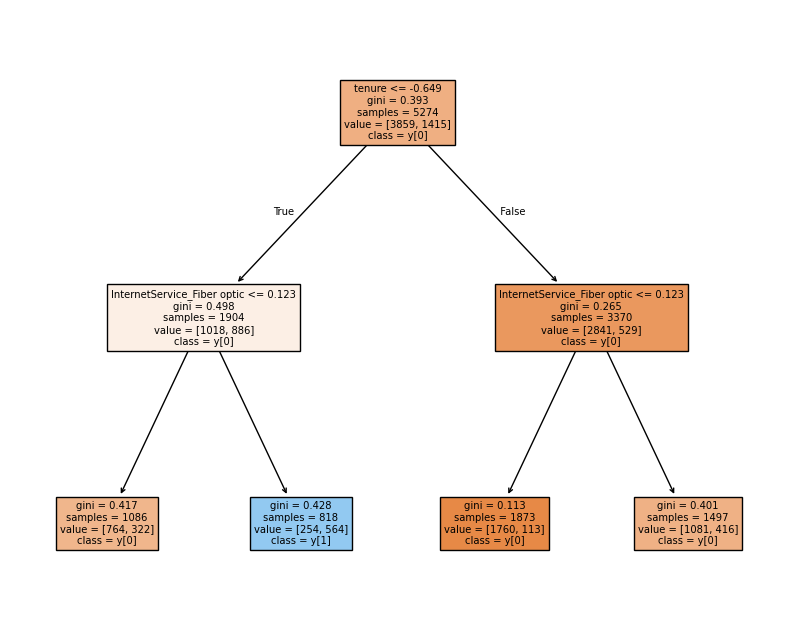

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(model_dt,filled=True, feature_names=x_train.columns, class_names=True)
plt.show()

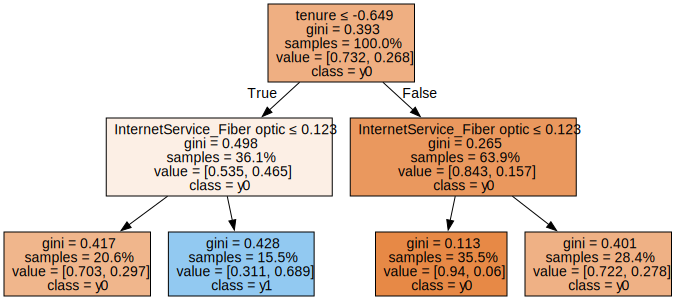

In [36]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model_dt, out_file="tree.dot", feature_names= x_train.columns , class_names=True,filled=True, proportion= True, special_characters=True)

with open('tree.dot') as f:
    dot_graph=f.read()
graph= graphviz.Source(dot_graph, format='png')
graph

### Random Forest CLASSIFIER

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initiating the classifier
model_rf= RandomForestClassifier()

#Passing the data to classifier
model_rf.fit(x_train_sc,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred_rf=model_rf.predict(x_test_sc)

In [33]:
# Classification metrics = To check how the model is behaving

from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred_rf)*100,2)

78.38

Here we got better accuracy then KNN and Decision Tree. (Till now better model)

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initiating the classifier
model_rf1= RandomForestClassifier(n_estimators=200)

#Passing the data to classifier
model_rf1.fit(x_train_sc,y_train)

y_pred_rf1=model_rf1.predict(x_test_sc)

# Classification metrics = To check how the model is behaving

from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred_rf1)*100,2)

78.9

ok now this one is best . (also our accuracy changes because of not writing random state in train test split)

### Classification Metrics

In [34]:
from sklearn.metrics import classification_report

knn_report= classification_report(y_test,y_pred)
dt_report= classification_report(y_test,y_pred_dt)
rf_report= classification_report(y_test,y_pred_rf)

In [35]:
print('knn report', knn_report)

knn report               precision    recall  f1-score   support

          No       0.82      0.84      0.83      1262
         Yes       0.57      0.53      0.55       496

    accuracy                           0.75      1758
   macro avg       0.69      0.69      0.69      1758
weighted avg       0.75      0.75      0.75      1758



In [36]:
print('DT report', dt_report)

DT report               precision    recall  f1-score   support

          No       0.80      0.80      0.80      1262
         Yes       0.49      0.49      0.49       496

    accuracy                           0.71      1758
   macro avg       0.65      0.64      0.64      1758
weighted avg       0.71      0.71      0.71      1758



In [37]:
print('Rf report',rf_report)

Rf report               precision    recall  f1-score   support

          No       0.82      0.89      0.86      1262
         Yes       0.65      0.50      0.57       496

    accuracy                           0.78      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.77      0.78      0.77      1758



### Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import BernoulliNB

# Initiating the classifier
model_nb= BernoulliNB()

#Passing the data to classifier
model_nb.fit(x_train_sc,y_train)


# Prediction
y_pred_nb=model_nb.predict(x_test_sc)

# Classification metrics = To check how the model is behaving

from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred_nb)*100,2)

72.35

In [39]:
nb_report= classification_report(y_test,y_pred_nb)

In [41]:
print('nb report:',nb_report)

nb report:               precision    recall  f1-score   support

          No       0.90      0.69      0.78      1262
         Yes       0.51      0.80      0.62       496

    accuracy                           0.72      1758
   macro avg       0.70      0.75      0.70      1758
weighted avg       0.79      0.72      0.74      1758



### SVM Classifier

In [42]:
from sklearn.svm import SVC

# Initiating the classifier
model_svc= SVC()

#Passing the data to classifier
model_svc.fit(x_train_sc,y_train)


# Prediction
y_pred_svc=model_svc.predict(x_test_sc)

# Classification metrics = To check how the model is behaving

from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred_svc)*100,2)

78.78

In [43]:
svc_report= classification_report(y_test,y_pred_svc)

In [44]:
print('svc report:',svc_report)

svc report:               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1262
         Yes       0.66      0.51      0.57       496

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.79      0.78      1758



### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

# Initiating the classifier
model_lr= LogisticRegression()

#Passing the data to classifier
model_lr.fit(x_train_sc,y_train)


# Prediction
y_pred_lr=model_lr.predict(x_test_sc)

# Classification metrics = To check how the model is behaving

from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred_lr)*100,2)

78.73

In [47]:
lr_report= classification_report(y_test,y_pred_lr)
print('lr report:',lr_report)

lr report:               precision    recall  f1-score   support

          No       0.83      0.88      0.86      1262
         Yes       0.65      0.54      0.59       496

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



Above all the models done (considering only default models), we have SVC is the better model with 78.78% accuracy. (compared precision and recall also)
and we can also say that RF model with n_estimators=200 is better amongst all the model (78.9% accuracy).
Now we are aiming to increase the accuracy using the methods feature engineering and hyperparametrization.